In [1]:
# testing for channel break out strategy

In [107]:
# imports
import pandas as pd
import numpy as np
import yfinance as yf
from finta import TA
import hvplot.pandas
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [63]:
GAL = yf.download(tickers = "GAL.AX", period = "1y", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [55]:
GAL = GAL.reset_index()

In [56]:
GAL.columns = ["Date","Open","High","Low", "Close", "Adj Close", "Volume"]

In [57]:
GAL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-03,0.295,0.3000,0.280,0.290,0.290,408385
1,2021-06-04,0.290,0.2925,0.280,0.280,0.280,174949
2,2021-06-07,0.285,0.2850,0.280,0.280,0.280,156570
3,2021-06-08,0.280,0.2800,0.260,0.260,0.260,230235
4,2021-06-09,0.270,0.2700,0.270,0.270,0.270,43272
...,...,...,...,...,...,...,...
249,2022-05-30,1.850,1.8600,1.525,1.625,1.625,7417286
250,2022-05-31,1.550,1.6000,1.445,1.445,1.445,4527960
251,2022-06-01,1.440,1.4400,1.180,1.340,1.340,5449710
252,2022-06-02,1.320,1.8200,1.255,1.820,1.820,13729550


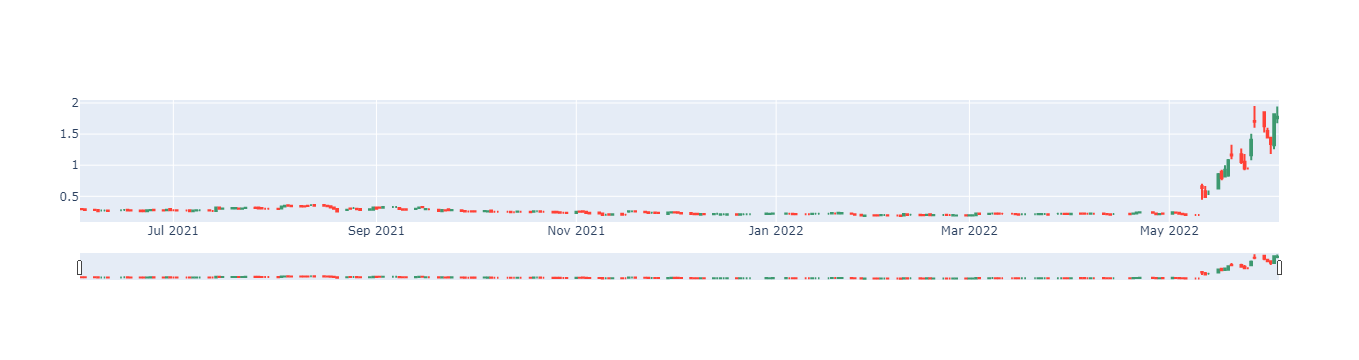

In [58]:
fig = go.Figure(data=[go.Candlestick(x=GAL['Date'],
                open=GAL['Open'],
                high=GAL['High'],
                low=GAL['Low'],
                close=GAL['Close'])])

fig.show()

In [65]:
#getting 10 days rolling max/min

GAL["10Dhigh"] = GAL.High.rolling(10).max()
GAL["10Dlow"] = GAL.Low.rolling(10).min()

In [60]:
GAL.tail()
GAL1 = GAL.copy()

In [66]:
GAL

,Open,High,Low,Close,Adj Close,Volume,10Dhigh,10Dlow
Date,,,,,,,,
2021-06-03,0.295,0.3000,0.280,0.290,0.290,408385,NaN,NaN
2021-06-04,0.290,0.2925,0.280,0.280,0.280,174949,NaN,NaN
2021-06-07,0.285,0.2850,0.280,0.280,0.280,156570,NaN,NaN
2021-06-08,0.280,0.2800,0.260,0.260,0.260,230235,NaN,NaN
2021-06-09,0.270,0.2700,0.270,0.270,0.270,43272,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-30,1.850,1.8600,1.525,1.625,1.625,7417286,1.95,0.760
2022-05-31,1.550,1.6000,1.445,1.445,1.445,4527960,1.95,0.815
2022-06-01,1.440,1.4400,1.180,1.340,1.340,5449710,1.95,0.815


In [75]:
graph = GAL[["Close", "10Dhigh", "10Dlow"]].hvplot()

In [46]:
#GAL1 = GAL1.drop(columns = ["Adj Close", "Volume"])
GAL1 = GAL1.dropna()
GAL1.head()

,Date,Open,High,Low,Close,10Dhigh,10Dlow
9,2021-06-17,0.285,0.285,0.265,0.270,0.300,0.260
10,2021-06-18,0.275,0.280,0.270,0.270,0.295,0.260
11,2021-06-21,0.270,0.270,0.255,0.260,0.295,0.255
12,2021-06-22,0.270,0.270,0.260,0.260,0.295,0.255
13,2021-06-23,0.260,0.275,0.260,0.275,0.295,0.255


In [108]:
# setting signal
GAL1["Signal"] = 0.0

# rules
for index, row in GAL1.iterrows():
    if row["Close"] <= row["10Dlow"]:
        GAL1.loc[index, "Signal"] = 1.0
    # while True:
    #     GAL1["Signal"] == 1
    # if row["Close"] >= row["10Dhigh"]:
    #     break
            
        
        
    if row["Close"] >= row["10Dhigh"]:
        GAL1.loc[index,"Signal"] = -1.0
        
# Calculate the points in time at which a position should be taken, 1 or -1
GAL1["Entry/Exit"] = GAL1["Signal"].diff()

In [103]:
GAL1.iloc[12:25]

,Date,Open,High,Low,Close,Adj Close,Volume,10Dhigh,10Dlow,Signal,Entry/Exit
21,2021-07-05,0.270,0.285,0.270,0.270,0.270,230138,0.295,0.26,0.0,0.0
22,2021-07-06,0.275,0.275,0.260,0.260,0.260,192773,0.295,0.26,1.0,1.0
23,2021-07-07,0.260,0.270,0.260,0.270,0.270,18866,0.295,0.26,0.0,-1.0
24,2021-07-08,0.270,0.275,0.270,0.275,0.275,49919,0.295,0.26,0.0,0.0
25,2021-07-09,0.275,0.280,0.260,0.275,0.275,142481,0.295,0.26,0.0,0.0
26,2021-07-12,0.275,0.275,0.260,0.270,0.270,71705,0.295,0.26,0.0,0.0
27,2021-07-13,0.265,0.270,0.260,0.265,0.265,81936,0.295,0.26,0.0,0.0
28,2021-07-14,0.265,0.320,0.260,0.320,0.320,2535811,0.320,0.26,-1.0,-1.0
29,2021-07-15,0.320,0.320,0.300,0.300,0.300,1078571,0.320,0.26,0.0,1.0
30,2021-07-16,0.300,0.305,0.300,0.305,0.305,225504,0.320,0.26,0.0,0.0


In [87]:
# Visualize entry position relative to close price
entry = GAL1[GAL1["Signal"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=100,
    legend=False,
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = GAL1[GAL1["Signal"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    width=1000,
    height=400
)



In [79]:
GAL1 = GAL1.dropna()

In [116]:
GAL1 = GAL1[GAL1.Volume != 0]

In [84]:
# Visualize close price for the investment
security_close = GAL1[["Close"]].hvplot(
    line_color='lightgray',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = GAL1[["10Dhigh", "10Dlow"]].hvplot(
    line_color = ["blue", "orange"],
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs
entry_exit_plot * entry * exit

:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

In [123]:
## Cumulative return GAL1frame

# Set the initial capital
initial_capital = float(100000)

# Set the share size
share_size = 50000

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
GAL1["Position"] = share_size * GAL1["Signal"]

# Find the points in time where a 500 share position is bought or sold
# GAL1["Entry/Exit Position"] = GAL1["Position"].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
GAL1["Portfolio Holdings"] = (
    GAL1["Close"] * GAL1["Position"].cumsum()
)

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
GAL1["Portfolio Cash"] = (
    initial_capital - (GAL1["Close"] * GAL1["Position"]).cumsum()
)

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
GAL1["Portfolio Total"] = (
    GAL1["Portfolio Cash"] + GAL1["Portfolio Holdings"]
)

# Calculate the portfolio daily returns
GAL1["Portfolio Daily Returns"] = GAL1["Portfolio Total"].pct_change()

# Calculate the cumulative returns
GAL1["Portfolio Cumulative Returns"] = (
    1 + GAL1["Portfolio Daily Returns"]
).cumprod() - 1

# Print the GAL1Frame
GAL1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,10Dhigh,10Dlow,Signal,Entry/Exit,Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
249,2022-05-30,1.850,1.860,1.525,1.625,1.625,7417286,1.95,0.760,0.0,0.0,0.0,1.056250e+06,-42499.996722,1.013750e+06,-0.045882,9.1375
250,2022-05-31,1.550,1.600,1.445,1.445,1.445,4527960,1.95,0.815,0.0,0.0,0.0,9.392500e+05,-42499.996722,8.967500e+05,-0.115413,7.9675
251,2022-06-01,1.440,1.440,1.180,1.340,1.340,5449710,1.95,0.815,0.0,0.0,0.0,8.710000e+05,-42499.996722,8.285000e+05,-0.076108,7.2850
252,2022-06-02,1.320,1.820,1.255,1.820,1.820,13729550,1.95,0.920,0.0,0.0,0.0,1.183000e+06,-42499.996722,1.140500e+06,0.376584,10.4050
253,2022-06-03,1.755,1.945,1.675,1.780,1.780,8055524,1.95,0.920,0.0,0.0,0.0,1.157000e+06,-42499.996722,1.114500e+06,-0.022797,10.1450


In [110]:
# Prepare Portfolio Evaluation Metrics GAL1Frame
# Create the list of the metric names
metrics = [
    'Annualized Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio'
]

# Create a list that holds the column name
columns = ['Backtest']

# Initialize the GAL1Frame with index set to evaluation metrics and columns 
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)

# Review the GAL1Frame
portfolio_evaluation_df

# Calculate the Annualized return metric
portfolio_evaluation_df.loc['Annualized Return'] = (
    GAL1['Portfolio Daily Returns'].mean() * 252
)

# Calculate the Cumulative returns metric
portfolio_evaluation_df.loc['Cumulative Returns'] = GAL1['Portfolio Cumulative Returns'][-1]

# Calculate the Annual volatility metric
portfolio_evaluation_df.loc['Annual Volatility'] = (
    GAL1['Portfolio Daily Returns'].std() * np.sqrt(252)
)

# Calculate the Sharpe ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    GAL1['Portfolio Daily Returns'].mean() * 252) / (
    GAL1['Portfolio Daily Returns'].std() * np.sqrt(252)
)

# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a GAL1Frame that contains the Portfolio Daily Returns column
sortino_ratio_df = GAL1[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation GAL1Frame
portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

portfolio_evaluation_df

KeyError: -1